In [1]:
import numpy as np
import GPy

### No need for custom implemtation
GPML (`@covSEiso`) and GPy (`RBF`) kernel definitions are the same.

$k_{SE}(x,x') = \sigma^{2}\left( \frac{(x - x')^2}{2 \ell^2} \right)$

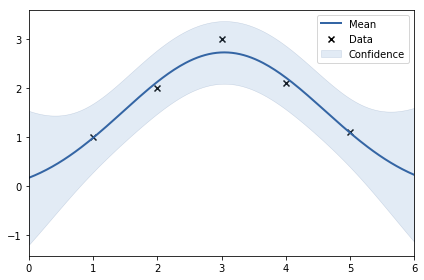

In [9]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 2, 3, 2.1, 1.1]).reshape(-1, 1) 

ell = 1.5
sf  = 2.5**2
sn  = 0.1**2

k = GPy.kern.RBF(1, variance=sf, lengthscale=ell)

gpml_result = np.array([
    [6.25000000000000, 5.00460876823005, 2.56945181566992, 0.845845520228829, 0.178534379903440],
    [5.00460876823005, 6.25000000000000, 5.00460876823005, 2.56945181566992, 0.845845520228829],
    [2.56945181566992, 5.00460876823005, 6.25000000000000, 5.00460876823005, 2.56945181566992],
    [0.845845520228829, 2.56945181566992, 5.00460876823005, 6.25000000000000, 5.00460876823005],
    [0.178534379903440, 0.845845520228829, 2.56945181566992, 5.00460876823005, 6.25000000000000]])

# Test covariance matrix correctness
cov_mat = k.K(X, X)
assert np.allclose(cov_mat, gpml_result)

m = GPy.models.GPRegression(X, y, kernel=k, noise_var=sn)
m.optimize_restarts(verbose=False)
m.plot()

# Test negative log marginal likelihood correctness
gpml_nlml = 6.3643
assert np.isclose(gpml_nlml, -m.log_likelihood(), rtol=1e-03)